<a href="https://colab.research.google.com/github/singhhshipra/ML_LAB_/blob/main/1BM22CS341_LAB_9_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("income.csv")

# Drop rows with missing values (if any)
df = df.dropna()

# Separate features and target variable
X = df.drop('income_level', axis=1)
y = df['income_level']

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy Score:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy Score: 0.8328385709898659
Confusion Matrix:
[[7117  297]
 [1336 1019]]


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Top 5 Models by Accuracy:

   Base Estimator  n_estimators  learning_rate  accuracy
3   Decision Tree            10            1.0       1.0
2   Decision Tree            10            0.5       1.0
5   Decision Tree            50            0.1       1.0
9   Decision Tree           100            0.1       1.0
10  Decision Tree           100            0.5       1.0


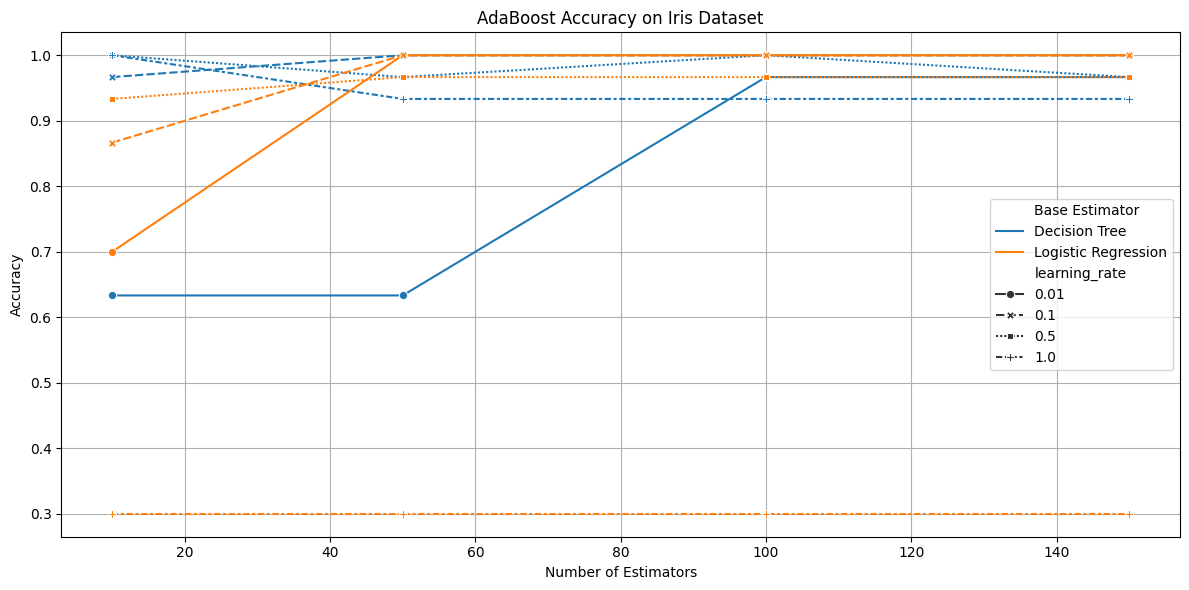

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("iris - iris.csv")

# Check column names to identify feature and target
print(df.columns)

# Encode target if needed
if df['species'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['species'] = label_encoder.fit_transform(df['species'])

# Features and target
X = df.drop('species', axis=1)
y = df['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters to tune
estimators_range = [10, 50, 100, 150]
learning_rates = [0.01, 0.1, 0.5, 1.0]
results = []

# AdaBoost with DecisionTree
for n in estimators_range:
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append(('Decision Tree', n, lr, acc))

# AdaBoost with LogisticRegression
for n in estimators_range:
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=LogisticRegression(solver='liblinear'),
            n_estimators=n,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append(('Logistic Regression', n, lr, acc))


# Display results
df_results = pd.DataFrame(results, columns=['Base Estimator', 'n_estimators', 'learning_rate', 'accuracy'])
print("Top 5 Models by Accuracy:\n")
print(df_results.sort_values(by='accuracy', ascending=False).head())

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_results, x='n_estimators', y='accuracy', hue='Base Estimator', style='learning_rate', markers=True)
plt.title("AdaBoost Accuracy on Iris Dataset")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()
